# DataSet 준비

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                  columns=dataset['feature_names'] + ['target'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
x = df[df.columns[:-1]]
y = df['target']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [7]:
# 표준화 하기 
x = StandardScaler().fit_transform(x)

In [8]:
x_key = {}
for i, col in enumerate(df.columns[:-1]):
    x_key[col] = x[i]

transformed_df = pd.DataFrame(data=x_key, columns=df.columns[:-1])
transformed_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,-1.143017,-1.385353,-1.506521
1,1.032057,-0.124958,0.337848,0.106445
2,-1.341272,-1.341272,-1.398138,-1.284407
3,-1.312977,-1.312977,-1.312977,-1.312977


In [9]:
x.shape

(150, 4)

In [10]:
pca = decomposition.PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
reduced_x = pca.transform(x)

In [12]:
# 차원이 2개로 줄어든 걸 확인 할 수 있다. 
reduced_x.shape

(150, 2)

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline

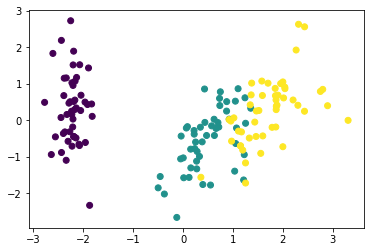

In [14]:
plt.scatter(reduced_x[:,0], reduced_x[:,1], c=y)
plt.show()

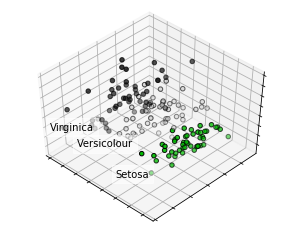

<Figure size 1080x1080 with 0 Axes>

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

dataset = load_iris()

X = dataset.data
y = dataset.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()